In [179]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [180]:
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\25_Agra\Book_25_1.csv')

In [181]:
df.head()

,Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR
0,01-01-2021,74.468112,141.11729,9.429299,16.73296,8.605972,0.704772,22.593928,29.031834,62.524261,1.35002,162.198854,140.271744
1,02-01-2021,74.468112,141.11729,9.429299,16.73296,8.605972,0.704772,22.593928,29.031834,62.524261,1.35002,162.198854,140.271744
2,03-01-2021,74.468112,141.11729,9.429299,16.73296,8.605972,0.704772,22.593928,29.031834,62.524261,1.35002,162.198854,140.271744
3,04-01-2021,74.468112,141.11729,9.429299,16.73296,8.605972,0.704772,22.593928,29.031834,62.524261,1.35002,162.198854,140.271744
4,05-01-2021,74.468112,141.11729,9.429299,16.73296,8.605972,0.704772,22.593928,29.031834,62.524261,1.35002,162.198854,140.271744


In [182]:
df['Date'] = pd.to_datetime(df['Date'])

In [183]:
df.tail()

,Date,PM2.5,PM10,NO,NO2,SO2,CO,Ozone,Temp,RH,WS,WD,SR
360,2021-12-27,73.240,116.974,26.934,16.872,11.904,0.872,50.392,29.031834,69.952,0.344,205.128,0.000
361,2021-12-28,105.894,142.020,20.906,12.844,11.784,0.934,47.538,29.031834,72.694,0.272,170.178,0.000
362,2021-12-29,99.782,138.940,24.070,13.684,13.916,1.004,43.604,29.031834,62.010,0.380,192.170,0.000
363,2021-12-30,140.234,196.884,25.730,28.342,13.168,1.414,55.974,29.031834,75.100,0.240,162.544,0.000
364,2021-12-31,106.266,136.004,31.432,42.008,8.868,1.538,34.490,29.031834,78.994,0.274,162.500,14.492


In [184]:
y = pd.Series(data=df['PM2.5'].values, index=df['Date'])

In [185]:
y.head()

Date
2021-01-01    74.468112
2021-02-01    74.468112
2021-03-01    74.468112
2021-04-01    74.468112
2021-05-01    74.468112
dtype: float64

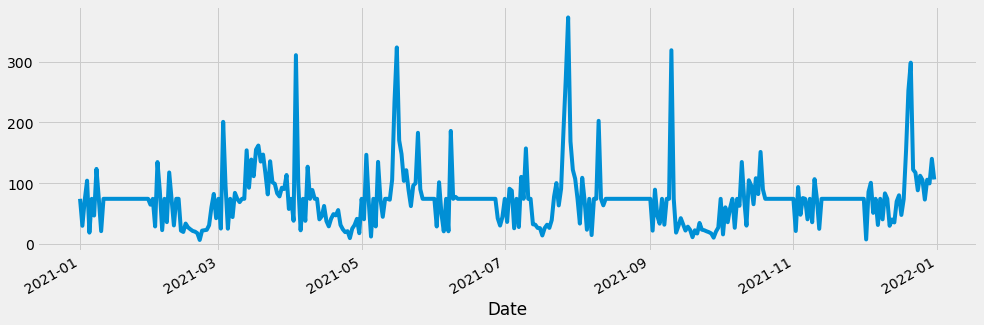

In [186]:
y.plot(figsize=(15, 5))
plt.show()

In [187]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [188]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 4302.917464786732
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 4043.64277433189
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 3975.6886920876186
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 3657.9348124578614
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 3942.5889202430712
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 3782.694714860765
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 3812.3962594081345
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 3659.861151756218
ARIMA(0, 0, 1) x (0, 0, 0, 12) - AIC: 3957.1231347014877
ARIMA(0, 0, 1) x (0, 0, 1, 12) - AIC: 3774.610575396442
ARIMA(0, 0, 1) x (0, 1, 0, 12) - AIC: 3777.2148419364976
ARIMA(0, 0, 1) x (0, 1, 1, 12) - AIC: 3461.7007539808483
ARIMA(0, 0, 1) x (1, 0, 0, 12) - AIC: 3732.732425599802
ARIMA(0, 0, 1) x (1, 0, 1, 12) - AIC: 3581.0901870538064
ARIMA(0, 0, 1) x (1, 1, 0, 12) - AIC: 3613.112449737558
ARIMA(0, 0, 1) x (1, 1, 1, 12) - AIC: 3463.6156681428106
ARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC: 3575.367543875614
ARIMA(0, 1, 0) x (0, 0, 1, 12) - AIC: 34

In [189]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7654      0.019     40.135      0.000       0.728       0.803
ma.L1         -1.0000     83.958     -0.012      0.990    -165.554     163.554
ma.S.L12      -1.0000    317.810     -0.003      0.997    -623.897     621.897
sigma2      1021.8613   3.42e+05      0.003      0.998    -6.7e+05    6.72e+05


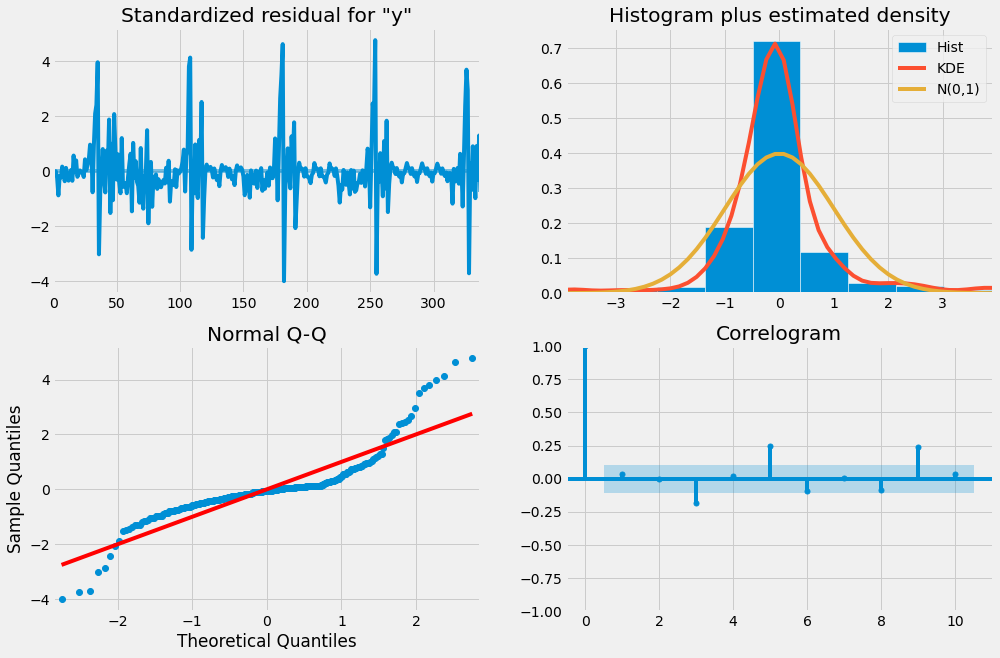

In [190]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

In [191]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

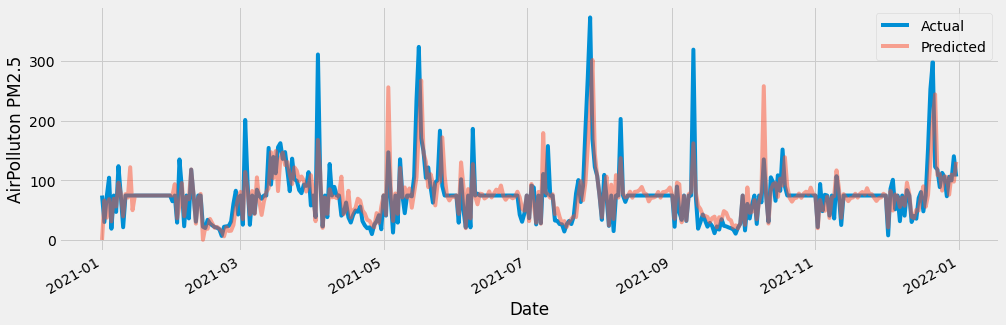

In [192]:
ax = y['2021-01-01':].plot(label='Actual', figsize=(15, 5))
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.5)

#ax.fill_between(pred_ci.index,
 #               pred_ci.iloc[:, 0],
  #              pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('AirPolluton PM2.5')
plt.legend()

plt.show()

In [193]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]


# Accuracy metrics
# Compute the mean square error
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_forecasted,y_truth)
print('r2 score')
print(r2)
#print("R2 score : %.2f" % r2_score(y_forecasted,y_truth))

mae = np.mean(np.abs(y_forecasted - y_truth))    # MAE
print('MAE')
print(mae)

mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE')
print(mse)
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

rmse = np.mean((y_forecasted - y_truth)**2)**.5  # RMSE
print('RMSE')
print(rmse)

mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
print('MAPE')
print(mape)   

 

r2 score
0.31156738106591375
MAE
18.632480646494898
MSE
1077.9689468403217
RMSE
32.83243741850918
MAPE
0.28445390809603444
